In [1]:
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import nibabel as nib
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import random

from nilearn.maskers import NiftiMasker
from nilearn.masking import compute_brain_mask
from nilearn.plotting import plot_stat_map, show
from nilearn.plotting import plot_roi, plot_glass_brain
from nilearn.image import clean_img
from nilearn.decoding import SpaceNetClassifier

# Loading the Data

In [3]:
# load beta images
# And clean them, replacing nans by 0s ...
beta_maps_dir = 'data/beta_maps'
beta_maps = []
for file in sorted(os.listdir(beta_maps_dir)):
    if file.endswith('.nii.gz'):
        map = nib.load(os.path.join(beta_maps_dir, file))
        beta_maps.append(clean_img(map, standardize=False, ensure_finite=True))

nb_sub = len(beta_maps)

print('Number of subjects: ', nb_sub)

Number of subjects:  49


# Obtaining the Mask

Shape of the mask:  (91, 109, 91)


C:\Users\User\miniforge3\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


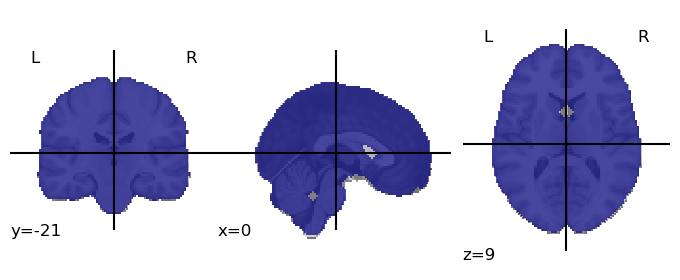

In [4]:
anat_path = 'data/anatomy/mask.nii'
anatomy = nib.load(anat_path)
mask = compute_brain_mask(anatomy, threshold = .3)

print('Shape of the mask: ', mask.shape)
plot_roi(mask)

# Labels

In [5]:
random.seed(42)
labels = np.tile(['caught', 'chase', 'checkpoint', 'close_enemy', 'protected_by_wall', 'vc_hit'], 5*49)
print('Numbers of labels/training samples: ', len(labels))

Numbers of labels/training samples:  1470


# Reordering the Data

In [11]:
beta_maps_train_run = beta_maps[0].slicer[..., :6]

for i in range(5):
    for j in range(49):
        sliced_by_run = beta_maps[j].slicer[..., (i*6):(i*6 + 6)]
        beta_maps_train_run = nib.funcs.concat_images([beta_maps_train_run, sliced_by_run], axis = -1)

beta_maps_train_run = beta_maps_train_run.slicer[..., 6:]

MemoryError: Unable to allocate 971. MiB for an array with shape (91, 109, 91, 282) and data type float32

# Training and Validation Sets (TO BE FIXED)

MemoryError: Unable to allocate 4.94 GiB for an array with shape (91, 109, 91, 1470) and data type float32